# **Movie Reviews Sentiment Analysis**

# Load necessary libraries

In [5]:
# install modules if working on local machine
#!pip install tensorflow
#!pip install wordcloud
#!pip install nltk

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kimla\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kimla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kimla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kimla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kimla\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Import dataset

Run the following code if working on Colab (takes 8-10 min !)

In [3]:
# Upload the local data file to colab
# from google.colab import files
# uploaded = files.upload()

# Explore the dataset

The dataset contains 50'000 highly polar movie reviews which are classified as positive or negative.

In [6]:
df = pd.read_csv('Reviews Dataset.csv')
print('The data shape is:', df.shape)
df.head(5) #preview the first 5 rows

The data shape is: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


We can observe the dataset is equally balanced between positive and negative reviews (25'000 each).

In [7]:
df.groupby(['sentiment'])[['sentiment']].count()

,sentiment
sentiment,
negative,25000
positive,25000


In [8]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

Let's add a column with the word count of each review and plot it

In [9]:
df['word count'] = df['review'].apply(no_of_words)
df.head(10)

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230
5,"Probably my all-time favorite movie, a story o...",positive,119
6,I sure would like to see a resurrection of a u...,positive,150
7,"This show was an amazing, fresh & innovative i...",negative,174
8,Encouraged by the positive comments about this...,negative,130
9,If you like original gut wrenching laughter yo...,positive,33


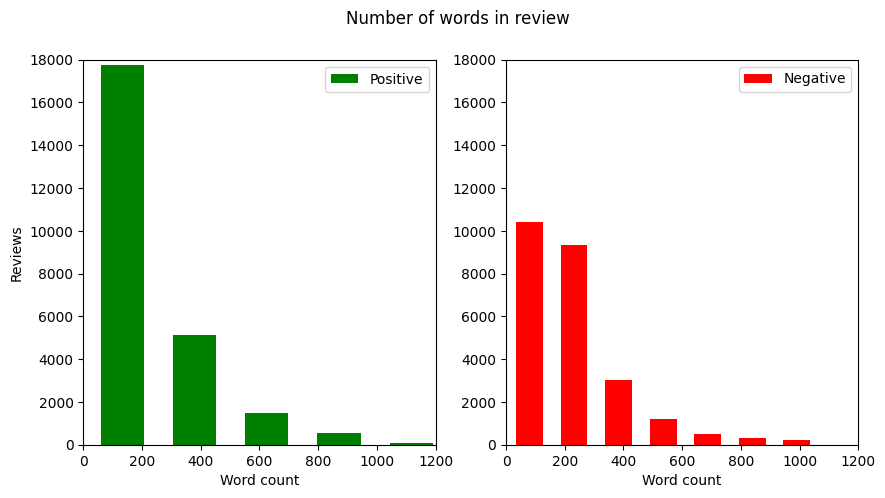

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
xlim = [0,1200]
ylim = [0,18000]
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='green', rwidth=0.6);
ax[0].legend(loc='upper right');
ax[0].set_xlabel('Word count');
ax[0].set_ylabel('Reviews');
ax[0].set_xlim(xlim);
ax[0].set_ylim(ylim);
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.6);
ax[1].legend(loc='upper right');
ax[1].set_xlabel('Word count');
ax[1].set_xlim(xlim);
ax[1].set_ylim(ylim);

fig.suptitle("Number of words in review")
plt.show()

In [11]:
#Let's check the total average word count and in each category
avg_wcount_pos = df[df['sentiment']=='positive']["word count"].mean()
avg_wcount_neg = df[df['sentiment']=='negative']["word count"].mean()
avg_wcount = df["word count"].mean()
print("Average number of words in all reviews:", avg_wcount)
print("Average number of words in positive reviews:", avg_wcount_pos)
print("Average number of words in negative reviews:", avg_wcount_neg)

Average number of words in all reviews: 231.15694
Average number of words in positive reviews: 232.84932
Average number of words in negative reviews: 229.46456


Let's have a look at one review

In [12]:
df['review'].loc[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

Let's visualize the most used words for each type of sentiment using word cloud

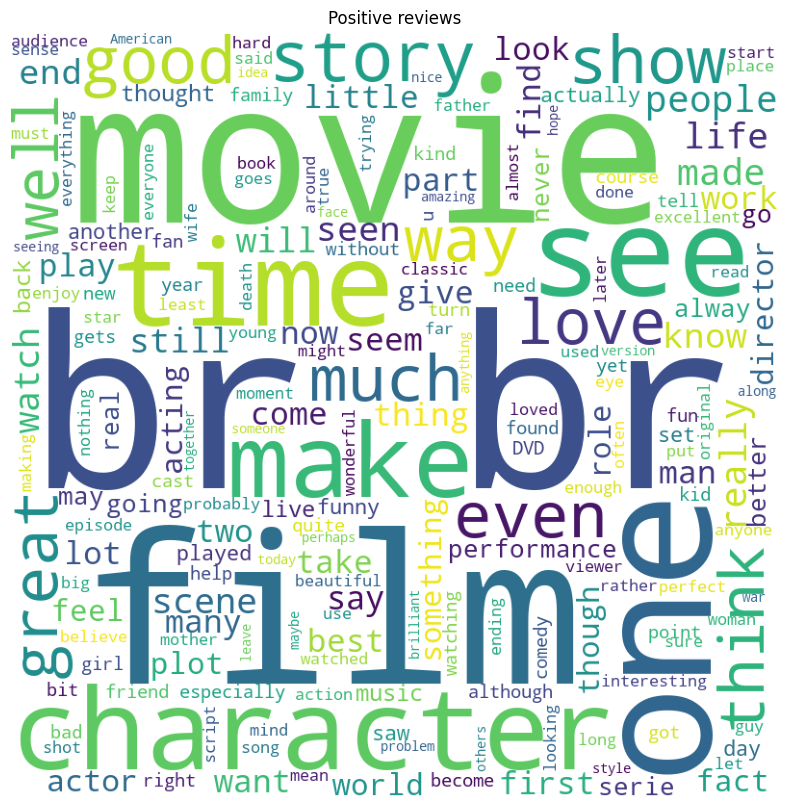

In [13]:
# Most used words in positive reviews

text_review = df ['review']
stopwords = set(STOPWORDS) #build-in list that allows to ignore common irrelevant words like "a", "the", "do", "how", etc.

pos=' '.join(map(str,text_review[df['sentiment']=='positive']))

wordcloud_pos = WordCloud(width = 800, height = 800,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 12).generate(pos) 

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_pos)
plt.title('Positive reviews')
plt.axis('off')
plt.show() 

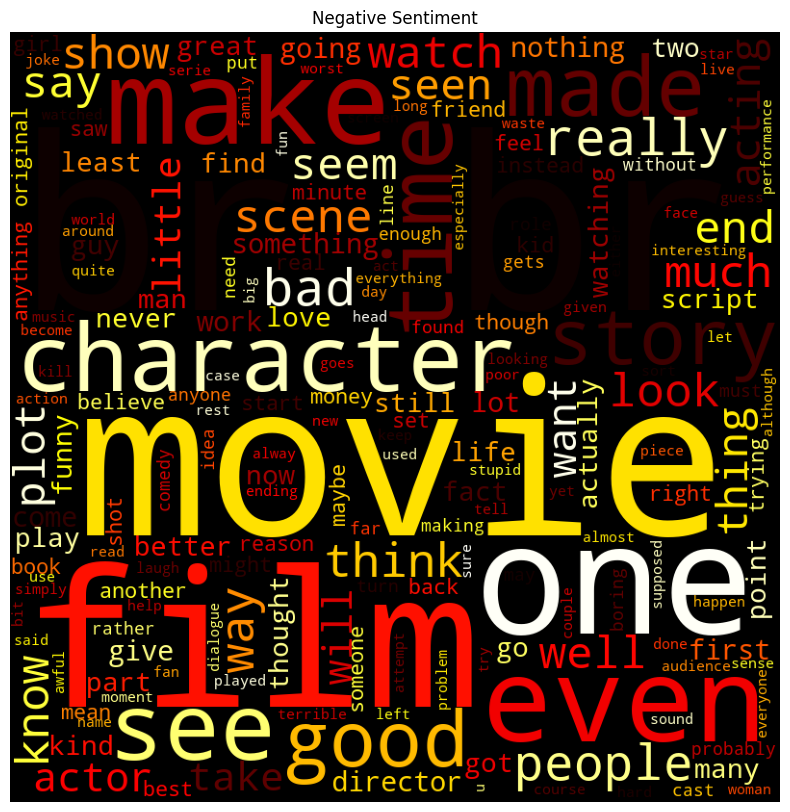

In [14]:
# Most used words in negative reviews

neg=' '.join(map(str,text_review[df['sentiment']=='negative']))

wordcloud_neg = WordCloud(width = 800, height = 800, 
                colormap = 'hot',
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 12).generate(neg) 

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_neg)
plt.title('Negative Sentiment')
plt.axis('off')
plt.show() 

We can see that the most used words contain some html tags ('br'). Also, words like 'film' or 'movie' are very frequent but don't tell much about the sentiment. We will do some cleaning during the data preprocessing.


# Data Preprocessing

**Remove punctuation, special caracters, uppercase and extra spaces**


In [15]:
df['review'] = df['review'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))   #clear punctuation
df['review'] = df['review'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))   #clear special characters
df['review'] = df['review'].apply(lambda x: x.lower())                      #lowercase
df['review'] = df['review'].apply(lambda x: x.strip())                      #clear extra spaces

In [16]:
# df['review'].loc[0]  #uncomment to have a look at a review after this first cleaning

**Remove Stopwords (frequent words that don't give any insight in the sentiment analysis)**

In [17]:
# Let's check the build-in list of Stopwords
import nltk
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(stops)

{'so', 's', 'wouldn', 'under', 'isn', 'should', 'does', 'we', 'did', 'for', 'do', 'where', 'was', 'its', 'any', 'than', 'because', 'again', "you'll", 'o', "you're", 'hadn', 'hers', 'an', 'over', 'after', 'this', 'mightn', 'until', 'himself', 'most', 'just', 'out', 'couldn', 'shan', "that'll", 'me', 'those', 'only', "mightn't", 'don', 'by', 'it', 'are', 'is', 'below', 'd', 'that', 've', 'didn', 'wasn', 'my', 'doing', 'more', 'him', 'have', 'about', 'yourself', 'what', 'needn', 'itself', 'her', 'ain', 'ours', 'here', "didn't", 'he', 'very', 'of', 'some', 'too', 'from', 'weren', 'or', 'no', "aren't", "mustn't", 'why', "you'd", "needn't", 'be', 'the', 'which', 'were', 'to', 'while', 'off', "shouldn't", 'down', 'ma', 'during', 'will', 'had', "couldn't", 'themselves', 'has', "isn't", 'mustn', "won't", 'on', 'they', "you've", "wasn't", 'his', 'been', 'and', 'above', 'm', 'theirs', 'ourselves', 'you', 'against', 'between', "it's", 'i', 't', 'then', 'same', 'now', 'but', 'own', "shan't", "hasn'

In [18]:
# Add our own custom Stopwords
add_stopwords = ["film", "movie", "character", "br"]
NewStopword = nltk.corpus.stopwords.words('english')
NewStopword.extend(add_stopwords)

In [19]:
# Remove stopwords  #takes 1 min to run
def token(values):
    words = nltk.tokenize.word_tokenize(values)
    filtered_words = [word for word in words if word not in set(NewStopword)]
    not_stopword_doc = " ".join(filtered_words)
    return not_stopword_doc
df['review'] = df['review'].apply(lambda x: token(x))

In [20]:
# df['review'].loc[0]  #uncomment to have a look at a review after removing Stopwords

**Apply lemmatization**

In [21]:
# Lemmatization (= stripping the word to its root form, eg. 'working', 'worker', 'works' are transformed into 'work'
lemmatizer = WordNetLemmatizer()

def lemmatize_it(sent):
    empty = []
    for word, tag in pos_tag(word_tokenize(sent)):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
            lemma = word
            empty.append(lemma)
        else:
            lemma = lemmatizer.lemmatize(word, wntag)
            empty.append(lemma)
    return ' '.join(empty)

In [22]:
df['review'] = df['review'].apply(lemmatize_it) # takes about 7 min to run

**Check cleaned data**

In [23]:
#Let's have a look at a review after the data cleaning
df['review'].loc[1]

'wonderful little production film technique unassuming old time bbc fashion give comfort sometimes discomforting sense realism entire piece actor extremely well choose michael sheen get polari voice pat truly see seamless edit guided reference williams diary entry well worth watch terrificly write perform piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remain solid disappears play knowledge sens particularly scene concern orton halliwell set particularly flat halliwell mural decorate every surface terribly well do'

In [24]:
# Let's check the word count again. 
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,one reviewer mention watch oz episode hook rig...,positive,160
1,wonderful little production film technique una...,positive,86
2,think wonderful way spend time hot summer week...,positive,84
3,basically family little boy jake think zombie ...,negative,59
4,petter mattei love time money visually stunnin...,positive,122


In [25]:
#Let's check the total average word count and in each category. It has reduced by 50%.
avg_wcount_pos = df[df['sentiment']=='positive']["word count"].mean()
avg_wcount_neg = df[df['sentiment']=='negative']["word count"].mean()
avg_wcount = df["word count"].mean()
print("Average number of words in all reviews:", avg_wcount)
print("Average number of words in positive reviews:", avg_wcount_pos)
print("Average number of words in negative reviews:", avg_wcount_neg)

Average number of words in all reviews: 114.33214
Average number of words in positive reviews: 116.25912
Average number of words in negative reviews: 112.40516


In [26]:
# Let's check the most common words in each category of sentiment

df_pos = df[df.sentiment =='positive']
df_neg = df[df.sentiment =='negative']

count = Counter()
for text in df_pos['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('one', 28114),
 ('see', 21799),
 ('make', 20886),
 ('like', 19588),
 ('time', 16296),
 ('get', 15978),
 ('well', 15378),
 ('good', 14973),
 ('story', 14099),
 ('great', 12916),
 ('go', 12568),
 ('watch', 12348),
 ('show', 12045),
 ('love', 11586),
 ('think', 10762)]

In [27]:
count = Counter()
for text in df_neg['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('one', 27034),
 ('make', 24676),
 ('like', 23873),
 ('see', 19599),
 ('get', 19301),
 ('even', 15308),
 ('time', 15111),
 ('go', 14805),
 ('good', 14685),
 ('bad', 14613),
 ('watch', 14306),
 ('would', 13995),
 ('really', 12310),
 ('well', 12155),
 ('look', 11655)]

# Prepare train set and test set

In [29]:
X = df['review']
Y = df['sentiment']

In [30]:
# Convert sentiment into numerical value (1 = positive, 0 = negative)
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

In [31]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
# Converting words to numbers. To use the text as input for a model, we first need to convert the words into tokens (=integers that refer to an index in a dictionary). 
# Here we will only keep the 10'000 most frequent words in the training set.

tk = Tokenizer(num_words=10000,
               char_level=False,
               split=' ')
tk.fit_on_texts(x_train)


In [33]:
# Now we convert the text of the reviews to a vector with 10'000 values, that indicate if the word appeared in the text or not.
x_train = tk.texts_to_matrix(x_train, mode='binary')
x_test = tk.texts_to_matrix(x_test, mode='binary')

In [34]:
x_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

# Build the model

In [35]:
model = Sequential()

model.add(Dense(units=8, activation='relu', input_shape=(10000,))) #input layer
model.add(Dense(units=3, activation='relu'))  #hidden layer
model.add(Dense(units=1, activation='sigmoid')) #output layer

optimizer =tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) #optimizer: Adam or rmsprop

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 80008     
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 80,039
Trainable params: 80,039
Non-trainable params: 0
_________________________________________________________________


# Fit the model

In [37]:
hist = model.fit(x_train, y_train, batch_size=1000, epochs=15, validation_data=(x_test, y_test))  #batch size = 50 if using reduced data

Epoch 1/15
40/40 [==============================] - 2s 24ms/step - loss: 0.6530 - accuracy: 0.6053 - val_loss: 0.6056 - val_accuracy: 0.7039
Epoch 2/15
40/40 [==============================] - 1s 16ms/step - loss: 0.5705 - accuracy: 0.7693 - val_loss: 0.5487 - val_accuracy: 0.8011
Epoch 3/15
40/40 [==============================] - 1s 14ms/step - loss: 0.5224 - accuracy: 0.8289 - val_loss: 0.5163 - val_accuracy: 0.8325
Epoch 4/15
40/40 [==============================] - 1s 14ms/step - loss: 0.4907 - accuracy: 0.8603 - val_loss: 0.4954 - val_accuracy: 0.8559
Epoch 5/15
40/40 [==============================] - 0s 11ms/step - loss: 0.4673 - accuracy: 0.8796 - val_loss: 0.4812 - val_accuracy: 0.8592
Epoch 6/15
40/40 [==============================] - 0s 11ms/step - loss: 0.4486 - accuracy: 0.8925 - val_loss: 0.4702 - val_accuracy: 0.8674
Epoch 7/15
40/40 [==============================] - 0s 12ms/step - loss: 0.4330 - accuracy: 0.9041 - val_loss: 0.4627 - val_accuracy: 0.8708
Epoch 8/15
40

# Evaluate model

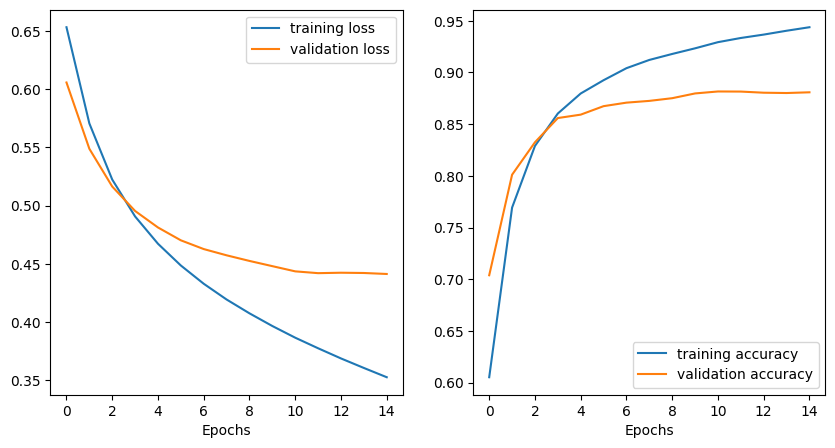

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='upper right')
axs[0].set_xlabel('Epochs');
axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])
axs[1].set_xlabel('Epochs');

axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')
plt.show()

In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print ('Test loss:', test_loss)
print ('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4414 - accuracy: 0.8808
Test loss: 0.44136112928390503
Test accuracy: 0.8808000087738037


We achieve an accuracy of 88% but the model is massively overfitting.  How can we prevent this ? Is there an issue with the model or in the data preprocessing ?